    The previous section suggested that there was non linearity in the data and that the data would not conform to the 4 requirements for inear Regression. The suggestioon that temp squared was proposed as one way of addressing te first requirement.  WHAT IS THE REAL WORLD PURPOSE of finding a predictor for mwand how accurate does it need to be eg: 
    1) Predict potential burnouts because of excess power requirements (important in my country)
    2) predict spot pricing for generator companies in a market based system? (again important but spot price would need to have been included)
   3) ?????
  

In [472]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
sns.set()
%matplotlib inline



In [591]:
#Set up training and test data for regression anaysis and graphing

train = pd.read_pickle('train.pki')  #load previously created training data
test=pd.read_pickle('test.pki')

#manually replace first nan value not done in step 2....

train.at['2017-02-01 00:00:00 ', 'temp'] = 37.0

#create a new variable for square of temp in both test and train for convenience
#create a new variable for square of temp in both test and train for convenience
# split test data into two temperature sets 60+ and <60 in attempt to 
# ensure data condition 1 of regression LAWS 

train['tempsq']=train['temp']*train['temp']*np.sign(train['temp'])
train['Predictor']=0
train_60=train.loc[train['temp']>=60]
train_Less60=train.loc[train['temp']<60]
test['tempsq']=test['temp']*test['temp']*np.sign(test['temp'])
test['Predictor']=0
test_60 = test.loc[test['temp']>=60]
test_Less60 = test.loc[test['temp']<60]

#Print out descriptive stats for each of the two sub dataframe  and two rows

print(train_60.describe())
print(test_Less60.describe())
print(train.head(2))

                 mw         temp          hour     dayofweek         month  \
count  11501.000000  11501.00000  11501.000000  11501.000000  11501.000000   
mean    1682.713833     70.76689     12.204591      2.959917      7.042083   
std      330.139861      6.73348      6.702171      1.989768      1.841116   
min     1080.568000     60.00000      0.000000      0.000000      1.000000   
25%     1441.045000     66.00000      7.000000      1.000000      6.000000   
50%     1613.053000     70.00000     13.000000      3.000000      7.000000   
75%     1884.925000     75.00000     18.000000      5.000000      8.000000   
max     2795.093000     92.00000     23.000000      6.000000     12.000000   

               year        tempsq  Predictor  
count  11501.000000  11501.000000    11501.0  
mean    2017.991827   5053.288508        0.0  
std        0.818229    974.879750        0.0  
min     2017.000000   3600.000000        0.0  
25%     2017.000000   4356.000000        0.0  
50%     2018.00


Run a series of regressioons using both temp and temp squared and determining the intercept
Use the both the original train data frame and the partitioned frames to compare relative R2 performance.


In [475]:
#calculate regression with intercept using temp
y=train['mw']
x1=train[['temp']]
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     3032.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:57:44   Log-Likelihood:            -1.7931e+05
No. Observations:               25539   AIC:                         3.586e+05
Df Residuals:                   25537   BIC:                         3.586e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1295.6669      5.095    254.322      0.000    1285.681    1305.653
temp           4.9495      0.090     55.062      0.000       4.773       5.126
==============================================================================
Omnibus:                     1637.586   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1968.210
Skew:                           0.662   Prob(JB):                         0.00
Kurtosis:                       3.308   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [476]:
#Calculate regression with intercept with tempsq  
#increased R-Squared 
#reduction in std error of mw coefficent 0.09 ->  0.001, intercept 5.095->3.110
# decreased f-stat
y=train['mw']
x1=train[['tempsq']]
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     6630.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:57:44   Log-Likelihood:            -1.7780e+05
No. Observations:               25539   AIC:                         3.556e+05
Df Residuals:                   25537   BIC:                         3.556e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1342.9619      3.110    431.832      0.000    1336.866    1349.057
tempsq         0.0676      0.001     81.426      0.000       0.066       0.069
==============================================================================
Omnibus:                      888.618   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.733
Skew:                           0.476   Prob(JB):                    1.79e-213
Kurtosis:                       2.887   Cond. No.                     7.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R2 values for both temp and tempsq are indicative that the equations do not
adequately explain the values of MW. The lack of linearity of the data is one cause
We run the identical regressions without the requirement for an intercept ie essentially looking at the correlation of mw and temp ....it shows a significantly higher Rsq because not dependent on the linearity forced by having an intercept 

In [479]:
#Test OLS expression suggested in notes
#No intercept r-squared 0.897  st err 0.001 which is similar to above
sm.OLS(train['mw'], train['temp']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     mw   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                          2.221e+05
Date:                Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                        12:57:48   Log-Likelihood:                     -1.9543e+05
No. Observations:               25539   AIC:                                  3.909e+05
Df Residuals:                   25538   BIC:                                  3.909e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp          26.5061      0.056    471.259      0.000      26.396      26.616
==============================================================================
Omnibus:                     3153.615   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4446.324
Skew:                           0.983   Prob(JB):                         0.00
Kurtosis:                       3.563   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Section 3
Winter and Summer Plots highlight the change in gradient/non linearity associated with temperature divide around teperature 60f/65c as well as the impact of dayof week, time of day


In [447]:

train_january = train.loc[(train['month'] == 1)]
train_july = train.loc[ (train['month'] == 7)]

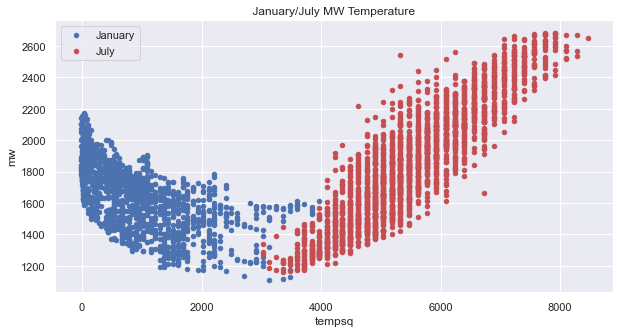

In [448]:
ax1=train_january.plot(kind ='scatter',x='tempsq',
                      y='mw',
                      color='b', label='January',figsize=(10,5))
ax2=train_july.plot(kind='scatter',x='tempsq',
                      y='mw',
                      color='r',ax=ax1, label='July')

plt.title(' January/July MW Temperature ')
plt.show()

Scatter plot between energy and temperature to highlight difference between hours of midnight and noon and later. Again note the non linearity

In [449]:
train_midnight = train.loc[(train['hour'] == 0)]
train_midday = train.loc[(train['hour'] == 12)]
train_5pm = train.loc[(train['hour'] == 18)]

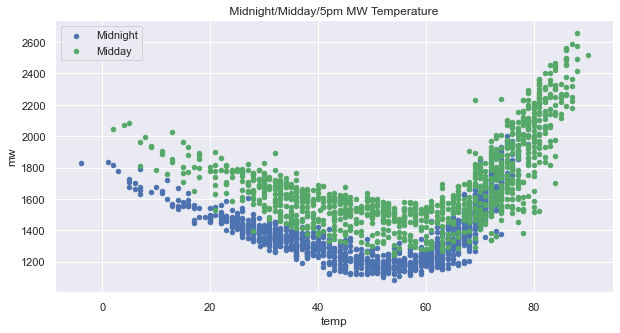

In [450]:
ax1=train_midnight.plot(kind ='scatter',x='temp',
                      y='mw',
                      color='b',label='Midnight',figsize=(10,5))
ax2=train_midday.plot(kind='scatter',x='temp',
                      y='mw',
                      color='g',label='Midday',ax=ax1)

#ax3=train_5pm.plot(kind='scatter',x='temp', y='mw', color='r',label='6 PM',ax=ax1)

plt.title(' Midnight/Midday/5pm MW Temperature ')
plt.show()


6 Day of week did seem to influence but when you examine scatter its not so emphasised 
with regard to mw:temperature influence

In [451]:
train_wens = train.loc[(train['dayofweek'] == 2)]
train_sat = train.loc[(train['dayofweek'] == 5)]
train_sun = train.loc[(train['dayofweek'] == 6)]

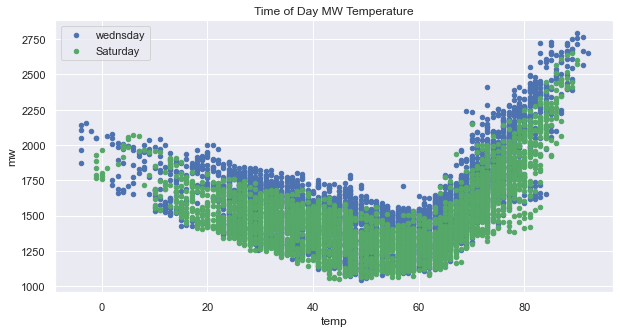

In [452]:
ax1=train_wens.plot(kind ='scatter',x='temp',
                      y='mw',
                      color='b',label='wednsday',
                      figsize=(10,5))
ax2=train_sat.plot(kind='scatter',x='temp',y='mw', color='g',ax=ax1,label='Saturday')

#ax3=train_sun.plot(kind='scatter',x='temp', y='mw', color='r',ax=ax1,label='Sunday')

plt.title(' Time of Day MW Temperature ')

plt.show()




On the basis of the results so far we will try regression on temperature partitioned data



In [477]:
#Calculate regression with intercept with temp  on partitioned data
#increased R-Squared 
#reduction in std error of mw coefficent 0.09 ->  0.001, intercept 5.095->3.110
# decreased f-stat
y=train_60['mw']
x1=train_60[['temp']]
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 3.026e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:57:45   Log-Likelihood:                -75603.
No. Observations:               11501   AIC:                         1.512e+05
Df Residuals:                   11499   BIC:                         1.512e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1270.8136     17.056    -74.506      0.000   -1304.247   -1237.380
temp          41.7360      0.240    173.944      0.000      41.266      42.206
==============================================================================
Omnibus:                       17.750   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.214
Skew:                          -0.003   Prob(JB):                     2.47e-05
Kurtosis:                       3.210   Cond. No.                         751.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [478]:
#Calculate regression with intercept with tempsq  on partitioned data
#increased R-Squared 
#reduction in std error of mw coefficent 0.09 ->  0.001, intercept 5.095->3.110
# decreased f-stat
y=train_60['mw']
x1=train_60[['tempsq']]
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 3.153e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:57:46   Log-Likelihood:                -75430.
No. Observations:               11501   AIC:                         1.509e+05
Df Residuals:                   11499   BIC:                         1.509e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.8032      8.401     25.925      0.000     201.335     234.271
tempsq         0.2899      0.002    177.580      0.000       0.287       0.293
==============================================================================
Omnibus:                       48.147   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.314
Skew:                           0.002   Prob(JB):                     3.98e-15
Kurtosis:                       3.372   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results indicate a significant increase in RSq and reduction of error
Tempsq offers marginal increase over temp
the MEAP value gives more confidence with an error of less than 10%

In [515]:
# CAlclulate MEAP for this regression on tempsq and temp of 60 and above

train.loc[(train.temp >= 60), 'Predictor'] = 217.8032  + 0.2899 * train_60['tempsq']

Mape = (((train_60.mw - train_60.Predictor).abs())/train_60.mw).mean() * 100
print('MEAP ',round(Mape,2))                             


MEAP  8.35


In [480]:
#Test second alternative expression for Regression coding suggested in notes --->matches results
sm.OLS.from_formula('mw ~ tempsq', data=train_60).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 3.153e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:57:49   Log-Likelihood:                -75430.
No. Observations:               11501   AIC:                         1.509e+05
Df Residuals:                   11499   BIC:                         1.509e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    217.8032      8.401     25.925      0.000     201.335     234.271
tempsq         0.2899      0.002    177.580      0.000       0.287       0.293
==============================================================================
Omnibus:                       48.147   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.314
Skew:                           0.002   Prob(JB):                     3.98e-15
Kurtosis:                       3.372   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [495]:

# Have looked at data over "ärbitary partition of 60 degrees" 
#  while subdivision may look arbitary it is visually supported by plots below and
#  the subdivision of 65 was tested and found to be less effective
# now look at under 60 partition ....temp and FIND THAT THIS NOT THAT GOOD A FIT

sm.OLS.from_formula('mw ~ temp', data=train_Less60).fit().summary()

8.345727549015939


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     8177.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:04:37   Log-Likelihood:                -90686.
No. Observations:               14038   AIC:                         1.814e+05
Df Residuals:                   14036   BIC:                         1.814e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1822.3905      4.217    432.177      0.000    1814.125    1830.656
temp          -9.2377      0.102    -90.430      0.000      -9.438      -9.038
==============================================================================
Omnibus:                     4107.151   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.224
Skew:                          -0.117   Prob(JB):                    7.89e-146
Kurtosis:                       1.957   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [445]:
# Repeat for tempsq and suprisingly get better value for temp not tempsq so model
#  ie best fit model y = a + b*temp 

sm.OLS.from_formula('mw ~ tempsq', data=train_Less60).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     6861.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:28:38   Log-Likelihood:                -91115.
No. Observations:               14038   AIC:                         1.822e+05
Df Residuals:                   14036   BIC:                         1.822e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1659.0943      2.757    601.795      0.000    1653.690    1664.498
tempsq        -0.1170      0.001    -82.829      0.000      -0.120      -0.114
==============================================================================
Omnibus:                     1518.906   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.069
Skew:                          -0.068   Prob(JB):                     9.12e-95
Kurtosis:                       2.150   Cond. No.                     4.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

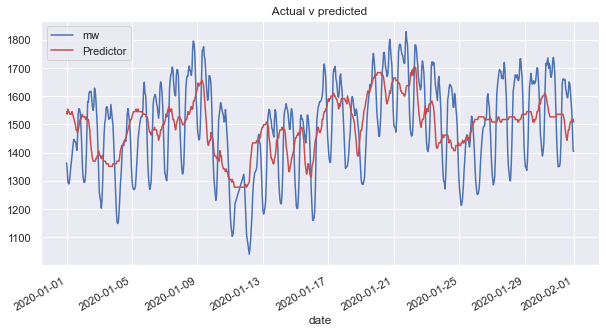

In [305]:
# this chart shows how inadequate the regression is at predicting the traning data
fig, ax = plt.subplots()
test_Less60.mw.plot(ax=ax,figsize=(10,5),style='b-')  #index is used as default x axis
test_Less60.Predictor.plot(ax=ax,style='r-', secondary_y=False)  #index is used as default x axis
plt.title(' Actual v predicted ')
ax.legend()
plt.show()

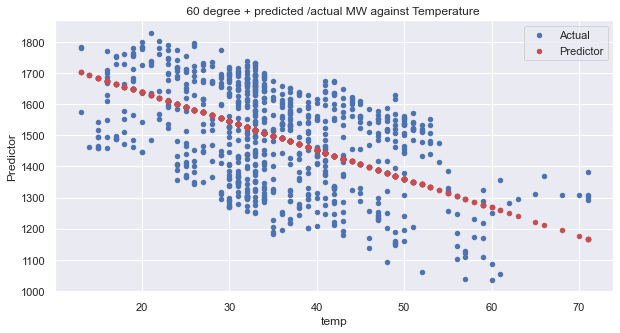

In [597]:
# Graphically the inadequacy of the linear relationship can be shown against the test data

test['Predictor'] = 1822.3905  - 9.2377 * test['temp']
ax1=test.plot(kind ='scatter',x='temp',
                      y='mw',
                      color='b', label='Actual',figsize=(10,5))
ax2=test.plot(kind='scatter',x='temp',
                      y='Predictor',
                      color='r',ax=ax1, label='Predictor')

plt.title(' 60 degree + predicted /actual MW against Temperature  ')
plt.show()

In [599]:
# lets try adding day of week to increase power of both >=60 and <60f regression models

sm.OLS.from_formula('mw ~ tempsq + C(dayofweek) + tempsq*C(dayofweek)', data=train_60).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     2982.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:37:28   Log-Likelihood:                -74532.
No. Observations:               11501   AIC:                         1.491e+05
Df Residuals:                   11487   BIC:                         1.492e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  194.9187     19.323     10.087      0.000     157.041     232.796
C(dayofweek)[T.1]          -18.0817     27.651     -0.654      0.513     -72.282      36.118
C(dayofweek)[T.2]           28.7509     28.513      1.008      0.313     -27.140      84.641
C(dayofweek)[T.3]           91.4236     28.523      3.205      0.001      35.515     147.333
C(dayofweek)[T.4]           32.7519     28.949      1.131      0.258     -23.992      89.496
C(dayofweek)[T.5]           55.1664     28.624      1.927      0.054      -0.942     111.274
C(dayofweek)[T.6]          -25.9861     28.426     -0.914      0.361     -81.706      29.733
tempsq                       0.3001      0.004     79.488      0.000       0.293       0.308
tempsq:C(dayofweek)[T.1]     0.0054      0.005      1.003      0.316      -0.005       0.016
tempsq:C(dayofweek)[T.2]    -0.0033      0.006     -0.605      0.545      -0.014       0.007
tempsq:C(dayofweek)[T.3]    -0.0139      0.006     -2.493      0.013      -0.025      -0.003
tempsq:C(dayofweek)[T.4]    -0.0053      0.006     -0.936      0.349      -0.016       0.006
tempsq:C(dayofweek)[T.5]    -0.0354      0.006     -6.343      0.000      -0.046      -0.024
tempsq:C(dayofweek)[T.6]    -0.0225      0.006     -4.076      0.000      -0.033      -0.012
==============================================================================
Omnibus:                      129.700   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.717
Skew:                           0.004   Prob(JB):                     5.88e-50
Kurtosis:                       3.688   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [600]:
sm.OLS.from_formula('mw ~ tempsq + C(dayofweek) + tempsq*C(dayofweek)', data=train_Less60).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     694.5
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:41:48   Log-Likelihood:                -90420.
No. Observations:               14038   AIC:                         1.809e+05
Df Residuals:                   14024   BIC:                         1.810e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1647.7779      7.386    223.087      0.000    1633.300    1662.256
C(dayofweek)[T.1]           31.4990     10.198      3.089      0.002      11.510      51.488
C(dayofweek)[T.2]           71.2713     10.028      7.107      0.000      51.615      90.928
C(dayofweek)[T.3]           55.4603     10.042      5.523      0.000      35.776      75.145
C(dayofweek)[T.4]           48.7393      9.964      4.891      0.000      29.208      68.270
C(dayofweek)[T.5]          -50.0668     10.028     -4.993      0.000     -69.723     -30.410
C(dayofweek)[T.6]          -86.2750     10.341     -8.343      0.000    -106.545     -66.005
tempsq                      -0.1014      0.004    -26.689      0.000      -0.109      -0.094
tempsq:C(dayofweek)[T.1]    -0.0144      0.005     -2.783      0.005      -0.025      -0.004
tempsq:C(dayofweek)[T.2]    -0.0250      0.005     -4.858      0.000      -0.035      -0.015
tempsq:C(dayofweek)[T.3]    -0.0172      0.005     -3.308      0.001      -0.027      -0.007
tempsq:C(dayofweek)[T.4]    -0.0197      0.005     -3.837      0.000      -0.030      -0.010
tempsq:C(dayofweek)[T.5]    -0.0155      0.005     -3.002      0.003      -0.026      -0.005
tempsq:C(dayofweek)[T.6]    -0.0079      0.005     -1.496      0.135      -0.018       0.002
==============================================================================
Omnibus:                      853.193   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.064
Skew:                          -0.208   Prob(JB):                     1.21e-85
Kurtosis:                       2.296   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [602]:
# so some improvement in both but still deficiencies 
# so go using full set of day/time/month variables using both tempsq and temp 

sm.OLS.from_formula('mw ~ tempsq + C(dayofweek) + temp*C(dayofweek) + C(month) + temp*C(month)+ C(hour) + temp*C(hour)', data=train_Less60).fit().summary()

#and not suprisingly we get a high Rsq value 

#Feed this regression equation back into prediction model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1718.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:45:46   Log-Likelihood:                -77017.
No. Observations:               14038   AIC:                         1.542e+05
Df Residuals:                   13955   BIC:                         1.548e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1779.8968      9.253    192.361      0.000    1761.760    1798.034
C(dayofweek)[T.1]         25.7826      6.308      4.088      0.000      13.419      38.146
C(dayofweek)[T.2]         61.8329      6.140     10.070      0.000      49.798      73.868
C(dayofweek)[T.3]         53.0585      6.172      8.596      0.000      40.960      65.157
C(dayofweek)[T.4]         54.3141      6.194      8.769      0.000      42.174      66.455
C(dayofweek)[T.5]        -27.0698      6.253     -4.329      0.000     -39.326     -14.813
C(dayofweek)[T.6]        -57.7139      6.425     -8.983      0.000     -70.308     -45.120
C(month)[T.2]             -9.2053      6.078     -1.515      0.130     -21.118       2.708
C(month)[T.3]            -30.6850      6.259     -4.903      0.000     -42.953     -18.417
C(month)[T.4]            -66.4022     10.217     -6.499      0.000     -86.429     -46.375
C(month)[T.5]           -481.4404     25.465    -18.906      0.000    -531.355    -431.526
C(month)[T.6]           -763.5036     64.721    -11.797      0.000    -890.365    -636.642
C(month)[T.7]          -1049.3645    538.666     -1.948      0.051   -2105.221       6.492
C(month)[T.8]          -1030.2184    201.171     -5.121      0.000   -1424.540    -635.897
C(month)[T.9]           -582.4370     55.772    -10.443      0.000    -691.758    -473.116
C(month)[T.10]          -126.3947     13.917     -9.082      0.000    -153.675     -99.115
C(month)[T.11]           -96.6651      7.752    -12.470      0.000    -111.859     -81.471
C(month)[T.12]           -45.2927      5.620     -8.059      0.000     -56.308     -34.277
C(hour)[T.1]             -34.0811     10.454     -3.260      0.001     -54.572     -13.590
C(hour)[T.2]             -55.4020     10.326     -5.365      0.000     -75.642     -35.162
C(hour)[T.3]             -61.1281     10.231     -5.975      0.000     -81.183     -41.073
C(hour)[T.4]             -46.3339     10.100     -4.588      0.000     -66.130     -26.537
C(hour)[T.5]              10.9095     10.072      1.083      0.279      -8.834      30.653
C(hour)[T.6]             107.0698     10.041     10.664      0.000      87.389     126.750
C(hour)[T.7]             172.2539     10.066     17.113      0.000     152.524     191.984
C(hour)[T.8]             188.1287     10.151     18.533      0.000     168.231     208.026
C(hour)[T.9]             210.1120     10.459     20.089      0.000     189.611     230.613
C(hour)[T.10]            234.2155     10.856     21.574      0.000     212.936     255.495
C(hour)[T.11]            251.0802     11.318     22.183      0.000     228.895     273.266
C(hour)[T.12]            256.7754     11.670     22.002      0.000     233.900     279.651
C(hour)[T.13]            256.8204     12.090     21.242      0.000     233.122  

In [613]:
# Test this against the entire training data 
sm.OLS.from_formula('mw ~ tempsq + C(dayofweek) + temp*C(dayofweek) + C(month) + temp*C(month)+ C(hour) + temp*C(hour)', data=train).fit().summary()

# higher but still considerably lower than partitioned data models



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     2694.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:10:06   Log-Likelihood:            -1.5176e+05
No. Observations:               25539   AIC:                         3.037e+05
Df Residuals:                   25456   BIC:                         3.044e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1853.8097     11.014    168.307      0.000    1832.221    1875.399
C(dayofweek)[T.1]         -5.0517      6.657     -0.759      0.448     -18.100       7.997
C(dayofweek)[T.2]         22.4510      6.561      3.422      0.001       9.591      35.311
C(dayofweek)[T.3]         17.5139      6.597      2.655      0.008       4.583      30.445
C(dayofweek)[T.4]         22.4964      6.626      3.395      0.001       9.508      35.484
C(dayofweek)[T.5]        -23.0538      6.593     -3.496      0.000     -35.977     -10.130
C(dayofweek)[T.6]        -51.1746      6.705     -7.632      0.000     -64.318     -38.032
C(month)[T.2]            128.5355      8.751     14.689      0.000     111.384     145.687
C(month)[T.3]            111.9885      8.932     12.537      0.000      94.481     129.496
C(month)[T.4]            112.6443     12.984      8.675      0.000      87.194     138.094
C(month)[T.5]           -545.9044     19.497    -28.000      0.000    -584.119    -507.690
C(month)[T.6]          -1184.5640     24.782    -47.800      0.000   -1233.138   -1135.990
C(month)[T.7]          -1507.8236     29.648    -50.857      0.000   -1565.936   -1449.712
C(month)[T.8]          -1472.1028     28.088    -52.410      0.000   -1527.157   -1417.049
C(month)[T.9]          -1058.9906     22.790    -46.467      0.000   -1103.660   -1014.321
C(month)[T.10]          -217.4183     15.086    -14.412      0.000    -246.988    -187.848
C(month)[T.11]            77.6857     10.881      7.139      0.000      56.358      99.014
C(month)[T.12]            37.1748      8.443      4.403      0.000      20.627      53.723
C(hour)[T.1]             -21.9120     12.321     -1.778      0.075     -46.061       2.237
C(hour)[T.2]             -30.6275     12.292     -2.492      0.013     -54.721      -6.534
C(hour)[T.3]             -37.5592     12.264     -3.063      0.002     -61.597     -13.522
C(hour)[T.4]             -18.5134     12.240     -1.513      0.130     -42.505       5.478
C(hour)[T.5]              36.5509     12.219      2.991      0.003      12.601      60.501
C(hour)[T.6]             137.2438     12.157     11.289      0.000     113.414     161.073
C(hour)[T.7]             215.1909     12.042     17.871      0.000     191.589     238.793
C(hour)[T.8]             252.6482     11.967     21.112      0.000     229.192     276.104
C(hour)[T.9]             298.1077     12.012     24.818      0.000     274.564     321.652
C(hour)[T.10]            334.3473     12.133     27.558      0.000     310.567     358.128
C(hour)[T.11]            346.8576     12.283     28.239      0.000     322.783     370.933
C(hour)[T.12]            336.7981     12.423     27.111      0.000     312.449     361.148
C(hour)[T.13]            321.6826     12.559     25.614      0.000     297.067  

In [603]:

# The coefficeints of the classified variables converted to arrays to simplify prediction equation
# probably could do this in code but....its copy and paste

cdaycoef=[0,25.782610,61.832907,53.058548,54.314109,-27.069788,-57.713904]
chourcoef=[0,-34.081099,-55.402021,-61.128080, -46.333856,10.909452,107.069752,172.253919, 188.128699,210.111969,234.215461,251.080201,256.775387,256.820419,251.569421,248.546532,278.220812,360.636537,377.313392,343.280197,295.293390,230.246487,142.817556,59.173972]
cthdaycoef=[0,-0.975998,-0.812949,-1.153635,-1.318240,-1.080607,0.080683]
cthhourcoef=[0,-0.003578, 0.086982,0.086982,0.046225,0.159920,-0.237619,-0.331995,0.247019,0.542813, 0.462117,0.251928,0.124815,0.066885,-0.076332,-0.208658,-0.627886,-1.795934,-2.054515,-1.448783,-0.711468,-0.293463,-0.035544,-0.009610]
ctmonth_jan=0

In [605]:
#CONVERT DATAFRAME TO A NUMPY ARRAY IN ORDER TO PRODUCE PRedictors using indexed coeficient
# strings identified in the regression above

temp = test[['mw','temp','hour','dayofweek','tempsq','Predictor']].copy()
A = temp.to_numpy()
print(len(test))

745


In [608]:
# Loop over the numpy array to insert vaue in the predictor array element
no_of_rows=len(test)-1
for i in range(0,no_of_rows ): 
           A[i,5] = (
            1779.896774 +  0.105503 * A[i,4]  -14.758506* A[i,1] +
            A[i,1]*cthhourcoef[int(A[i,2])] + chourcoef[int(A[i,2])] +  
            A[i,1]*cthdaycoef[int(A[i,3])] +  cdaycoef[int(A[i,3])]+
            A[i,1]*ctmonth_jan + ctmonth_jan
                              )

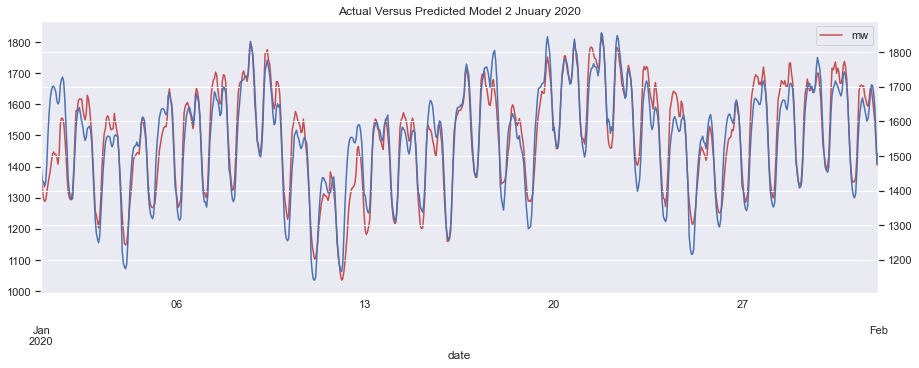

In [609]:
#Add this array into the Test dataframe and plot actual versus predicted 
# As hoped for with the high Rsq value it is a reasonable fit

test['Prediction']=A[:,5]
fig, ax = plt.subplots(figsize=(15, 5))
test.mw.plot(ax=ax,style='r-')  #index is used as default x axis
test.Prediction.plot(ax=ax,style='b-', secondary_y=True)  #index is used as default x axis
plt.title('Actual Versus Predicted Model 2 Jnuary 2020')
ax.legend()
plt.show() 

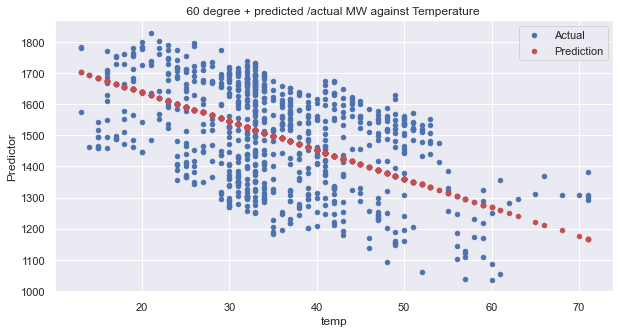

In [612]:
# Graphically the relationship between actual and predicted v temp is he same as the previous model
so the additional variable in this last model have signifiant improved its accuracy


ax1=test.plot(kind ='scatter',x='temp',
                      y='mw',
                      color='b', label='Actual',figsize=(10,5))
ax2=test.plot(kind='scatter',x='temp',
                      y='Predictor',
                      color='r',ax=ax1, label='Prediction')

plt.title(' 60 degree + predicted /actual MW against Temperature  ')
plt.show()

In [611]:
# CAlclulate MEAP  as a a measure of errors in this regression formula

Mape = (((test.mw - test.Prediction).abs())/test.mw).mean() * 100
print('MEAP ',round(Mape,2))                             


MEAP  4.33


Summarising
A Least Squares regression model involving date/time and temperatcan be constructed that predicts the expected power but it is relatively complex and  still has signifiant error in prediction. Partioning data on 60F provided a significant improvement in both over 60 and less that60F but it is more a ROT than a mathematically sound rule. However the non linearity of the data makes it a requirement